### This task is performed by Usama Azhar (Q1099178)

### Task 3: Choose a ``multi-dimensional data set`` (with at least 3 data features/attributes) suitable for a ``binary classification`` problem. Use ``Support Vector Machines (SVM)`` to build a ``binary classification model``. Evaluate its performance and perform a 3D visualization of the data classes and the boundary between them.

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import datasets

In [3]:
# Data loading and Preparation
# Source: The Breast Cancer Wisconsin (Diagnostic) dataset is a classic binary classification dataset. It's available in scikit-learn's datasets module.

cancer = datasets.load_breast_cancer()

In [4]:
# Creating a dataframe using pandas library
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

In [5]:
# Performing EDA and Descriptive Analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [7]:
# Still Checking for missing values
df.isnull().sum() 

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

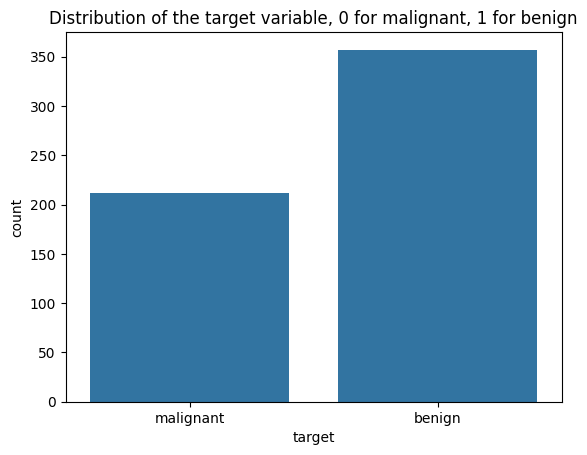

In [17]:
# Visualizing the distribution of the target variable 
# Malignant means cancerous, benign meaning non-cancerous
plt.Figure(figsize=(8,6))
sns.countplot(x='target', data=df)
plt.title('Distribution of the target variable, 0 for malignant, 1 for benign' )
plt.xticks([0,1], cancer.target_names)
plt.savefig('target_distribution.png', dpi=300)
plt.show()

In [9]:
# For multi-dimensional analysis, i'm going to use the three features: the first three
# mean radius
# mean texture
# mean perimeter
features_for_our_model = ['mean radius', 'mean texture', 'mean perimeter']
X = df[features_for_our_model]
y = df['target']

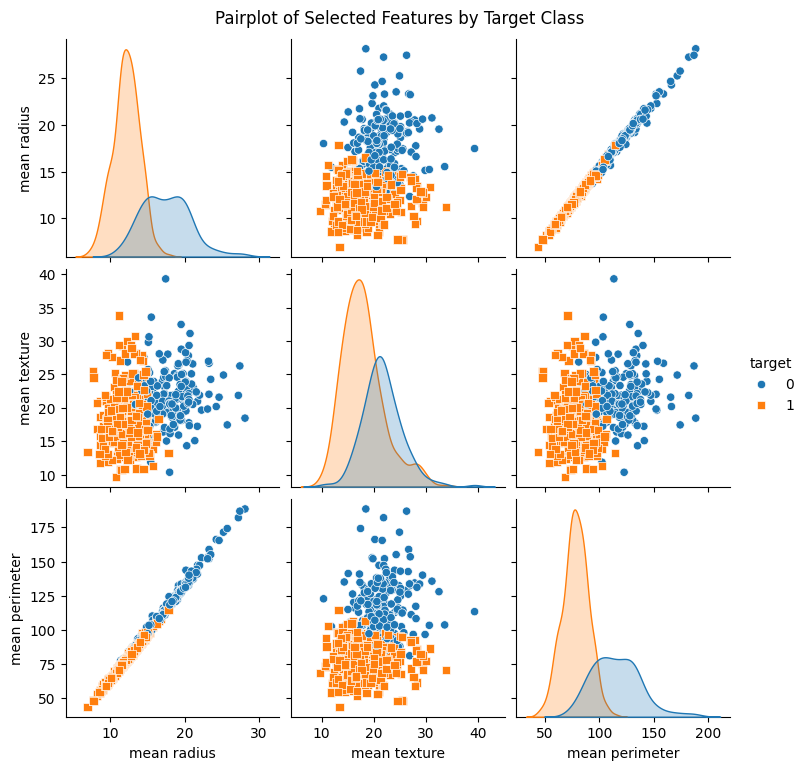

In [18]:
# Visualizing the relationships between selected features

sns.pairplot(df, vars=features_for_our_model, hue='target', markers=["o", "s"])
plt.suptitle('Pairplot of Selected Features by Target Class', y=1.02)
plt.savefig('pairplot_of_features.png', dpi=300)
plt.show()

In [11]:
# Preparing and training our Model
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Scaling our features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# Building and Predicting our model
# We will use a linear Support Vector Machine
# C is the regularization parameter.
svc = svm.SVC(kernel='linear', C=1.0)
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [14]:
y_pred = svc.predict(X_test)

In [15]:
# Checking our model performances
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=cancer.target_names)
conf_matrix = confusion_matrix(y_test, y_pred)

In [16]:
print('accuracy:', accuracy)
print('conf_matrix:', conf_matrix)
print(report)

accuracy: 0.9298245614035088
conf_matrix: [[38  5]
 [ 3 68]]
              precision    recall  f1-score   support

   malignant       0.93      0.88      0.90        43
      benign       0.93      0.96      0.94        71

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



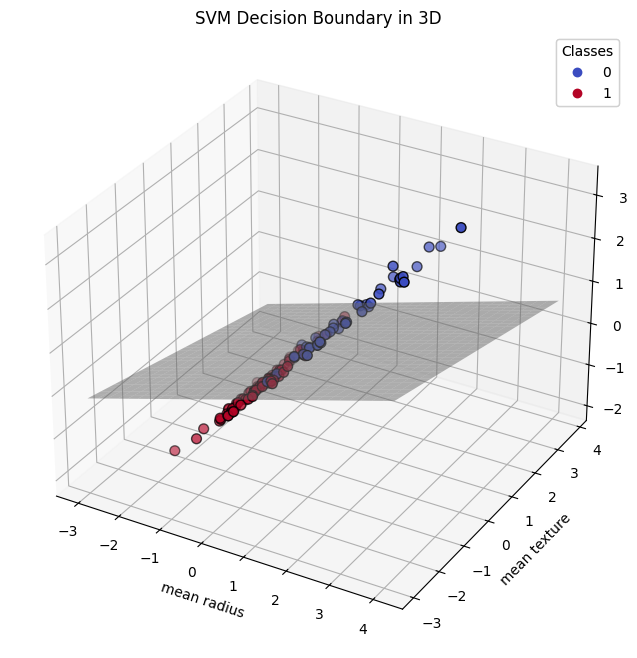

In [23]:
# Try to performing the 3D visuals

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the data points
# Malignant (class 0) as red, Benign (class 1) as green
# Note: X_test is now a numpy array, so we use integer indexing

scatter = ax.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=y_test, cmap=plt.cm.coolwarm, s=50, edgecolors='k')

#  Create a meshgrid to plot the decision boundary
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 30), 
                     np.linspace(y_min, y_max, 30))


# The decision boundary is a plane in 3D. We can find the z-coordinate of the plane.
# The equation of the plane is w0*x + w1*y + w2*z + b = 0
# So, z = (-w0*x - w1*y - b) / w2
w = svc.coef_[0]
b = svc.intercept_[0]

# This formula uses the tilt and height from the SVM to find the z-value.
zz = (-w[0] * xx - w[1] * yy - b) / w[2]

# Plotting the decision boundary plane
ax.plot_surface(xx, yy, zz, alpha=0.5,  color='gray')


# Setting labels and title
ax.set_xlabel(features_for_our_model[0])
ax.set_ylabel(features_for_our_model[1])
ax.set_zlabel(features_for_our_model[2])
ax.set_title('SVM Decision Boundary in 3D')
legend = ax.legend(title="Classes", *scatter.legend_elements())
ax.add_artist(legend)
plt.savefig('svm_decision_boundary.png', dpi=300)
plt.show()